In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv("/datasets/games.csv")

# Cambio de nombre a las columnas.

In [3]:
new_col_names = []

for old_name in games.columns:
    name_no_space = old_name.strip()
    name_lower = name_no_space.lower()
    new_col_names.append(name_lower)

games.columns = new_col_names

# Tipos de datos en las columnas.
---
En las siguientes celdas vamos a transformar el tipo de dato para las columnas "year_of_release" y "user_score":
* La columna "year_of_release" será tipo int, ya que no existen años con puntos.
* La columna "user_score" será del tipo float, ya que hay diferentes reseñas con números decimales.

In [4]:
games["year_of_release"].fillna(0, inplace=True)

In [5]:
games["user_score"].replace("tbd", "0", inplace=True)

In [6]:
games["year_of_release"] = games["year_of_release"].astype("int")
games["user_score"] = pd.to_numeric(games["user_score"])

# Valores ausentes.
---
De momento voy a dejar los valores ausentes tal y como están, si más adelante me afectan en el proceso, trataré de darle solución.

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
games["rating"] = games["rating"].fillna("unknown")

# Ventas totales.

In [9]:
def total_sales(row):
    na = row["na_sales"]
    eu = row["eu_sales"]
    jp = row["jp_sales"]
    other = row["other_sales"]
    total = na + eu + jp + other
    return total

games["total_sales"] = games.apply(total_sales, axis=1)

In [10]:
games.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8416,Wolfenstein 3D,GBA,2002,Shooter,0.12,0.04,0.00,0.00,57.0,6.0,M,0.16
2118,Brutal Legend,X360,2009,Action,0.62,0.26,0.00,0.09,82.0,8.0,M,0.97
2318,Harry Potter: Quidditch World Cup,PS2,2003,Sports,0.44,0.34,0.00,0.11,68.0,6.6,E,0.89
12168,Shin Lucky * Star: Moe Drill ~Tabidachi~,DS,2007,Action,0.00,0.00,0.07,0.00,NaN,NaN,unknown,0.07
16050,Just Cause,PS2,2006,Action,0.01,0.01,0.00,0.00,67.0,7.9,M,0.02
3885,Spectrobes: Beyond the Portals,DS,2008,Role-Playing,0.36,0.11,0.00,0.04,70.0,7.7,E10+,0.51
5960,WinBack: Covert Operations,PS2,2000,Shooter,0.14,0.11,0.00,0.04,66.0,7.7,T,0.29
13700,Way of the Samurai 2 Portable,PSP,2009,Action,0.00,0.00,0.04,0.00,NaN,NaN,unknown,0.04
15919,Oshiri Kajiri Mushi no Rhythm Lesson DS: Kawai...,DS,2008,Misc,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
11243,Assassin's Creed Chronicles,PS4,2016,Action,0.01,0.05,0.01,0.01,NaN,6.1,T,0.08


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


# Juegos lanzados por año.

In [12]:
games.groupby("year_of_release")["platform"].count()

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64

Podemos ver a partir del 2000 se empezaron a crear cada vez más videojuegos, yo supongo por el desarrollo de la tecnología. También se puede apreciar que existen 269 títulos que no tienen registrado su año de lanzamiento.

Me sorprende también ver como los números empiezan a bajar drasticamente después del año 2011, quizás estos datos no tomaron en cuenta los nuevos videojuegos para la nueva generación de consolas (ps4 y xbox one)

# Variación de ventas por plataforma.
---
Vamos a escoger las 10 plataformas con mayores ventas y ver su progreso a lo largo de los años.

In [13]:
sales_per_platform = games.groupby("platform")["year_of_release"].count().sort_values(ascending=False)
best_10 = sales_per_platform > 800
sales_per_platform[best_10]

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: year_of_release, dtype: int64

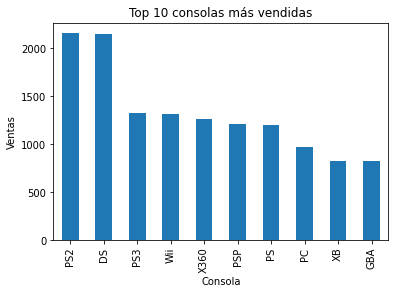

In [14]:
sales_per_platform[best_10].plot(kind="bar",x="platform",title="Top 10 consolas más vendidas",ylabel="Ventas",xlabel="Consola")
plt.show()

## Progreso a través de los años para la consola PS2.

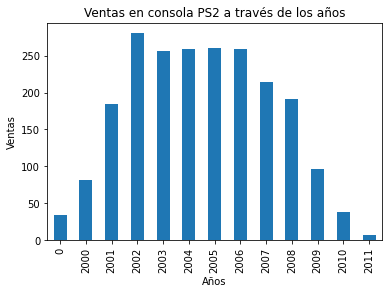

In [15]:
ps2 = games[games["platform"] == "PS2"].groupby("year_of_release")["platform"].count()

ps2.plot(kind="bar",x="year_of_release",title="Ventas en consola PS2 a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola DS.

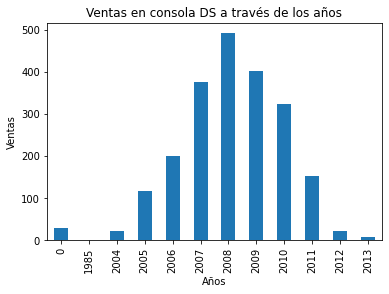

In [16]:
ds = games[games["platform"] == "DS"].groupby("year_of_release")["platform"].count()

ds.plot(kind="bar",x="year_of_release",title="Ventas en consola DS a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola PS3. 

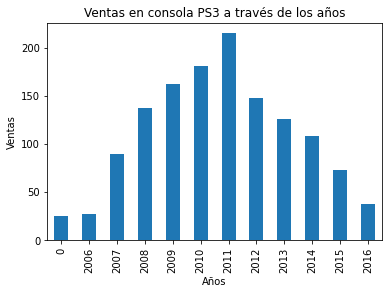

In [17]:
ps3 = games[games["platform"] == "PS3"].groupby("year_of_release")["platform"].count()

ps3.plot(kind="bar",x="year_of_release",title="Ventas en consola PS3 a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola Wii. 

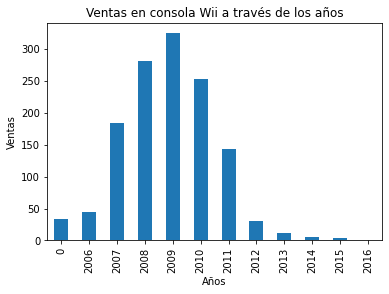

In [18]:
wii = games[games["platform"] == "Wii"].groupby("year_of_release")["platform"].count()

wii.plot(kind="bar",x="year_of_release",title="Ventas en consola Wii a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola Xbox 360. 

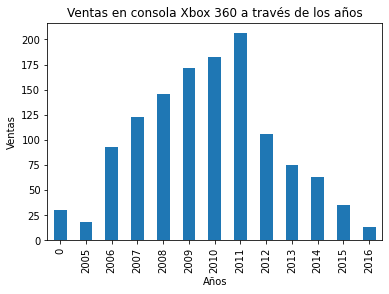

In [19]:
x360 = games[games["platform"] == "X360"].groupby("year_of_release")["platform"].count()

x360.plot(kind="bar",x="year_of_release",title="Ventas en consola Xbox 360 a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola PSP. 

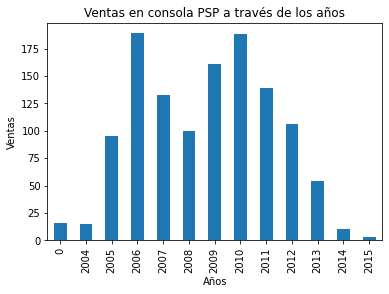

In [20]:
psp = games[games["platform"] == "PSP"].groupby("year_of_release")["platform"].count()

psp.plot(kind="bar",x="year_of_release",title="Ventas en consola PSP a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola PS1. 

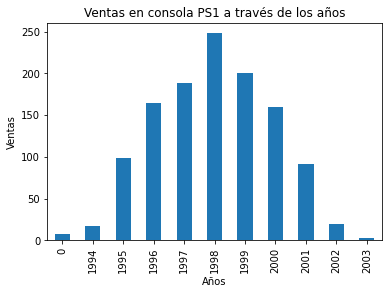

In [21]:
ps1 = games[games["platform"] == "PS"].groupby("year_of_release")["platform"].count()

ps1.plot(kind="bar",x="year_of_release",title="Ventas en consola PS1 a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para PC. 

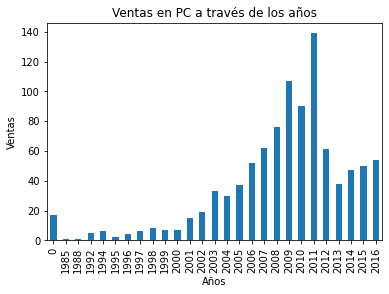

In [22]:
pc = games[games["platform"] == "PC"].groupby("year_of_release")["platform"].count()

pc.plot(kind="bar",x="year_of_release",title="Ventas en PC a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola Xbox. 

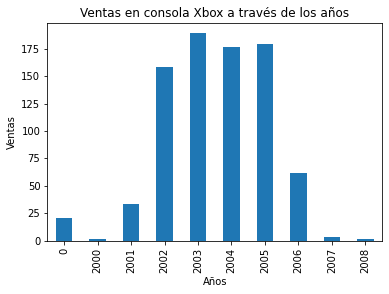

In [23]:
xb = games[games["platform"] == "XB"].groupby("year_of_release")["platform"].count()

xb.plot(kind="bar",x="year_of_release",title="Ventas en consola Xbox a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

## Progreso a través de los años para la consola Game Boy. 

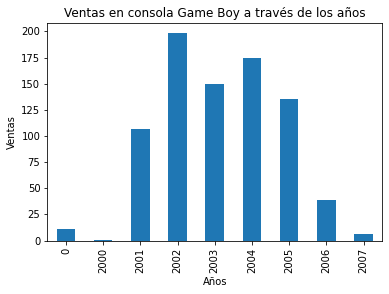

In [24]:
gba = games[games["platform"] == "GBA"].groupby("year_of_release")["platform"].count()

gba.plot(kind="bar",x="year_of_release",title="Ventas en consola Game Boy a través de los años",ylabel="Ventas",xlabel="Años")
plt.show()

# Conclusión.
---
Podemos ver que la popularidad de cada consola dura aproximadamente de 5 a 6 años, tiempo suficiente para que las compañías desarrollen nueva tecnología y puedan correr los juegos que el mercado está constantamente mejorando. 

Con el paso de los años, los videojuegos son más pesados y exigentes, por lo que una consola de hace 4 años no podría correrlos de una manera óptima, lo cual podría afectar la experiencia del usuario.

# Predicción para 2017.
---
Para realizar esta predicción, vamos a tomar los datos de los años 2015 y 2016.

In [25]:
games_2017 = games[(games["year_of_release"] == 2016) | (games["year_of_release"] == 2015)]

sales_per_platform_2017 = games_2017.groupby("platform")["year_of_release"].count().sort_values(ascending=False)
best_6 = sales_per_platform_2017 > 100
sales_per_platform_2017[best_6]

platform
PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
Name: year_of_release, dtype: int64

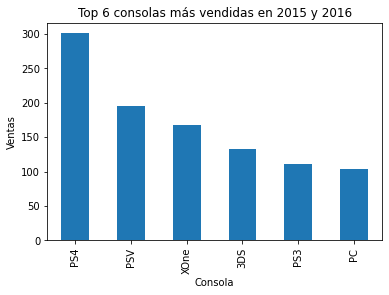

In [26]:
sales_per_platform_2017[best_6].plot(kind="bar",x="platform",title="Top 6 consolas más vendidas en 2015 y 2016",ylabel="Ventas",xlabel="Consola")
plt.show()

Podemos ver que las consolas PS4 y PSV son las preferidas para lanzar videojuegos, igual podríamos incluir el Xbox One. Esto nos quiere decir que para 2017 serán las más utilizadas, ya que tanto PS3 como Xbox 360 serán menos buscadas por los desarrolladores para mostrar sus proyectos, los nuevos videojuegos que salgan serán exclusivos para consolas de última generación.

In [27]:
games_sales_per_platform = games_2017.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
best_3 = games_sales_per_platform > 40

games_sales_per_platform[best_3]

platform
PS4     188.15
XOne     86.29
3DS      42.92
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='total_sales'>

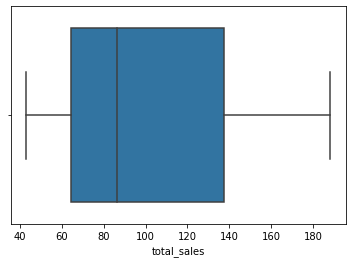

In [28]:
sns.boxplot(x=games_sales_per_platform[best_3])

Al final nos decantamos por tomar el total de ventas de videojuegos por consola para hacer un top 3. Vemos que tanto PS4 como Xbox One sobresalen por mucho del resto.

En promedio de ventas entre las 3 consolas tenemos poco menos de 90 millones, podemos pronosticar con certeza que PS4 será la que más venderá videojuegos el 2017.

# ¿Las reseñas de usuarios y profesionales afectan las ventas de una plataforma?
---
Vamos a tratar de responder la pregunta planteada usando los datos de distintas consolas:
* PS4
* Xbox One
* PS3
* Xbox 360

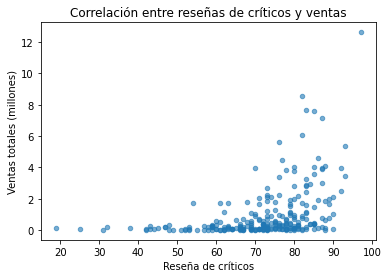

In [29]:
score_vs_sales_PS4 = games[games["platform"] == "PS4"][["name", "platform", "critic_score", "user_score", "total_sales"]]

score_vs_sales_PS4.plot(x="critic_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de críticos y ventas",
                        xlabel="Reseña de críticos",
                        ylabel="Ventas totales (millones)")
plt.show()

In [30]:
score_vs_sales_PS4[["critic_score", "total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


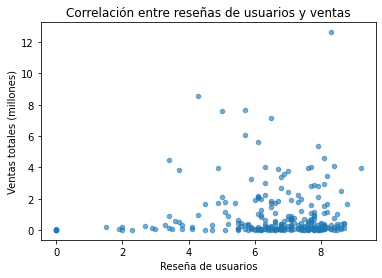

In [31]:
score_vs_sales_PS4.plot(x="user_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de usuarios y ventas",
                        xlabel="Reseña de usuarios",
                        ylabel="Ventas totales (millones)")
plt.show()

In [32]:
score_vs_sales_PS4[["user_score", "total_sales"]].corr()

,user_score,total_sales
user_score,1.000000,0.023279
total_sales,0.023279,1.000000


---
Ahora vamos a tratar de comprobar la conclusión anterior, pero en otra plataforma. Para este ejemplo se analizarán los datos con la consola Xbox One.

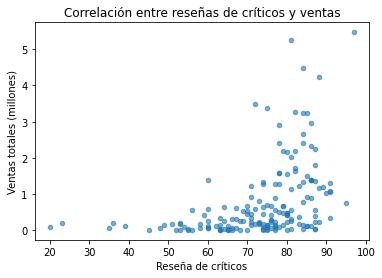

In [33]:
score_vs_sales_XOne = games[games["platform"] == "XOne"][["name", "platform", "critic_score", "user_score", "total_sales"]]

score_vs_sales_XOne.plot(x="critic_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de críticos y ventas",
                        xlabel="Reseña de críticos",
                        ylabel="Ventas totales (millones)")
plt.show()

In [34]:
score_vs_sales_XOne[["critic_score", "total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


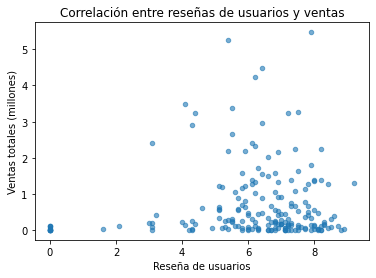

In [35]:
score_vs_sales_XOne.plot(x="user_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de usuarios y ventas",
                        xlabel="Reseña de usuarios",
                        ylabel="Ventas totales (millones)")
plt.show()

In [36]:
score_vs_sales_XOne[["user_score", "total_sales"]].corr()

,user_score,total_sales
user_score,1.000000,0.074486
total_sales,0.074486,1.000000


---
En esta sección se usarán los datos de la consola PS3.

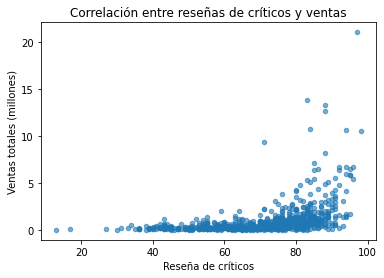

In [37]:
score_vs_sales_PS3 = games[games["platform"] == "PS3"][["name", "platform", "critic_score", "user_score", "total_sales"]]

score_vs_sales_PS3.plot(x="critic_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de críticos y ventas",
                        xlabel="Reseña de críticos",
                        ylabel="Ventas totales (millones)")
plt.show()

In [38]:
score_vs_sales_PS3[["critic_score", "total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.432432
total_sales,0.432432,1.000000


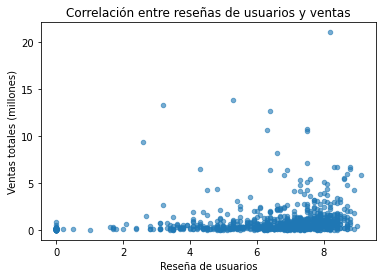

In [39]:
score_vs_sales_PS3.plot(x="user_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de usuarios y ventas",
                        xlabel="Reseña de usuarios",
                        ylabel="Ventas totales (millones)")
plt.show()

In [40]:
score_vs_sales_PS3[["user_score", "total_sales"]].corr()

,user_score,total_sales
user_score,1.000000,0.197654
total_sales,0.197654,1.000000


---
En esta sección usaremos por último los datos de la consola Xbox 360.

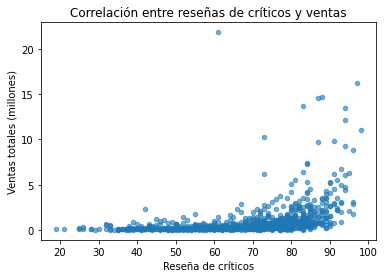

In [41]:
score_vs_sales_X360 = games[games["platform"] == "X360"][["name", "platform", "critic_score", "user_score", "total_sales"]]

score_vs_sales_X360.plot(x="critic_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de críticos y ventas",
                        xlabel="Reseña de críticos",
                        ylabel="Ventas totales (millones)")
plt.show()

In [42]:
score_vs_sales_X360[["critic_score", "total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.393736
total_sales,0.393736,1.000000


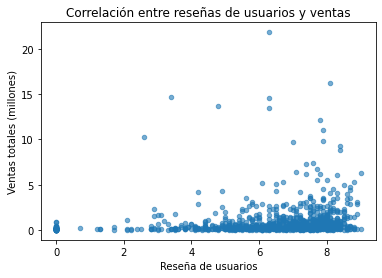

In [43]:
score_vs_sales_X360.plot(x="user_score", y='total_sales', kind='scatter', alpha=0.6, 
                        title="Correlación entre reseñas de usuarios y ventas",
                        xlabel="Reseña de usuarios",
                        ylabel="Ventas totales (millones)")
plt.show()

In [44]:
score_vs_sales_X360[["user_score", "total_sales"]].corr()

,user_score,total_sales
user_score,1.000000,0.166731
total_sales,0.166731,1.000000


# Conclusión.
---
Podemos ver que la correlación aumenta dependiendo de la quien realiza la calificación. La mayoría de plataformas tienen un 40% de correlación en promedio, si bien nos muestra información, no nos asegura que un juego será un éxito en ventas dependiendo de la crítica recibida. 

# ¿Cuáles son los géneros más rentables? ¿Y los que menos generan ventas?

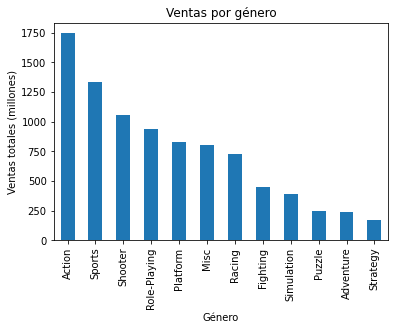

In [45]:
games.groupby("genre")["total_sales"].sum().sort_values(ascending=False).plot(kind="bar",
                                                                              title="Ventas por género",
                                                                              ylabel="Ventas totales (millones)",
                                                                              xlabel="Género")
plt.show()

El gráfico anterior nos muestra que el top 3 de géneros con más ventas son acción, deportes y disparo, todos superando la marca de mil millones. No hay gran sorpresa, ya que hoy en día los juegos más hablados se relacionan a estos géneros.

# Comparación de los mercados de Norte América, Japón y Europa.

## Norte América

### Las cinco plataformas principales.

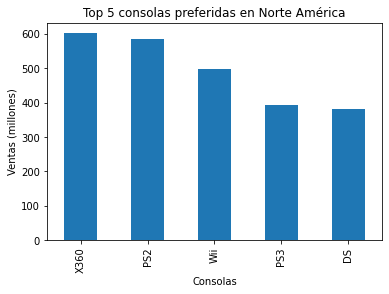

In [46]:
na = games[["name", "platform", "genre", "na_sales", "rating"]].groupby("platform")["na_sales"].sum().sort_values(ascending=False)
top_5 = na > 350

na[top_5].plot(kind="bar",title="Top 5 consolas preferidas en Norte América",xlabel="Consolas",ylabel="Ventas (millones)")
plt.show()

Resultado esperado, el lanzamiento de la consola Xbox 360 fue un bombazo en aquella época, llegó para hacerle competencia a Playstation. Me sorprende bastante que Wii esté en el top 3, inlcuso por arriba de la consola PS3. Podemos también ver que la Nintendo DS fue muy popular en su momento.

### Los cinco géneros principales.

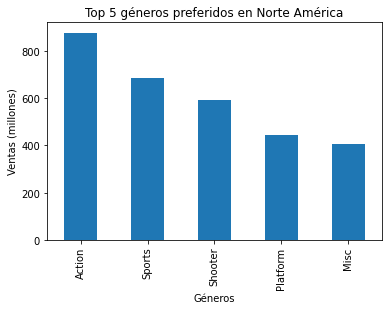

In [47]:
na = games[["name", "platform", "genre", "na_sales", "rating"]].groupby("genre")["na_sales"].sum().sort_values(ascending=False)
top_5 = na > 400

na[top_5].plot(kind="bar",title="Top 5 géneros preferidos en Norte América",xlabel="Géneros",ylabel="Ventas (millones)")
plt.show()

### ¿Las clasificaciones de ESRB afectan a las ventas?

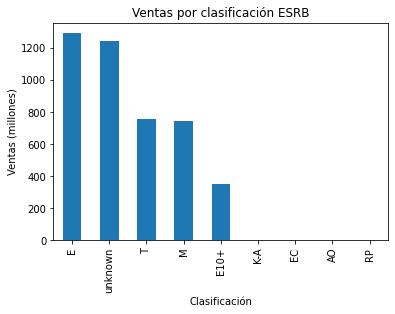

In [48]:
na = games[["name", "platform", "genre", "na_sales", "rating"]].groupby("rating")["na_sales"].sum().sort_values(ascending=False)

na.plot(kind="bar",title="Ventas por clasificación ESRB",xlabel="Clasificación",ylabel="Ventas (millones)")
plt.show()

Podemos ver que dependiendo de la clasificación, las ventas aumentarán, para complementar lo anterior también se podría tener en cuenta cuantos títulos hay por clasificación. 

De igual manera tenemos que tener en cuenta que no calculamos la cantidad de títulos por categoría. 

Pero queda más que claro que un videojuego que se clasifica sólo para adultos, no venderá lo mismo que uno con clasificación apta para todo público.

## Japón.

### Las cinco plataformas principales.

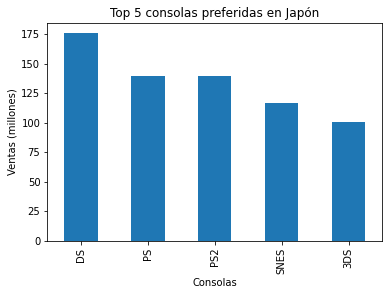

In [49]:
jp = games[["name", "platform", "genre", "jp_sales", "rating"]].groupby("platform")["jp_sales"].sum().sort_values(ascending=False)
top_5 = jp > 100

jp[top_5].plot(kind="bar",title="Top 5 consolas preferidas en Japón",xlabel="Consolas",ylabel="Ventas (millones)")
plt.show()

Resultado sorprendente, no sólo porque practicamente el top 5 se compone de consolas desarrolladas por marcas Japonesas, sino también porque Nintendo DS fue el primer lugar, yo esperaba que este fuera cualquier consola de Playstation. 

### Los cinco géneros principales.

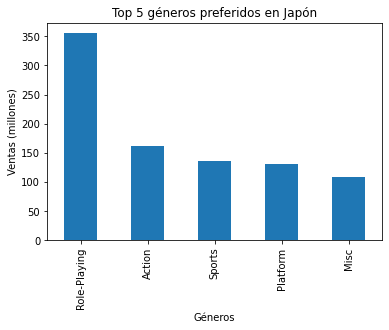

In [50]:
jp = games[["name", "platform", "genre", "jp_sales", "rating"]].groupby("genre")["jp_sales"].sum().sort_values(ascending=False)
top_5 = jp > 100

jp[top_5].plot(kind="bar",title="Top 5 géneros preferidos en Japón",xlabel="Géneros",ylabel="Ventas (millones)")
plt.show()

Resultado muy diferente a lo mostrado en Norte América, aquí no se tiene al género de disparo en los primeros lugares, ¿Será parte de la cultura de ambas naciones?

### ¿Las clasificaciones de ESRB afectan a las ventas?

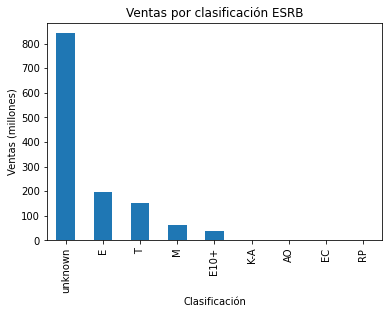

In [51]:
jp = games[["name", "platform", "genre", "jp_sales", "rating"]].groupby("rating")["jp_sales"].sum().sort_values(ascending=False)

jp.plot(kind="bar",title="Ventas por clasificación ESRB",xlabel="Clasificación",ylabel="Ventas (millones)")
plt.show()

## Europa.

### Las cinco plataformas principales.

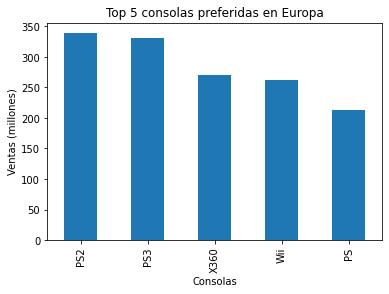

In [52]:
eu = games[["name", "platform", "genre", "eu_sales", "rating"]].groupby("platform")["eu_sales"].sum().sort_values(ascending=False)
top_5 = eu > 200

eu[top_5].plot(kind="bar",title="Top 5 consolas preferidas en Europa",xlabel="Consolas",ylabel="Ventas (millones)")
plt.show()

Es relevante que la Nintendo DS no se encuentre en nuestro top 5, de igual manera podemos apreciar que Playstation es la consola preferida en Europa.

### Los cinco géneros principales.

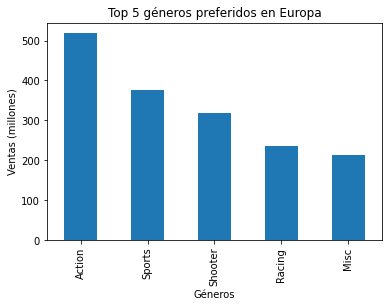

In [53]:
eu = games[["name", "platform", "genre", "eu_sales", "rating"]].groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
top_5 = eu > 201

eu[top_5].plot(kind="bar",title="Top 5 géneros preferidos en Europa",xlabel="Géneros",ylabel="Ventas (millones)")
plt.show()

### ¿Las clasificaciones de ESRB afectan a las ventas?

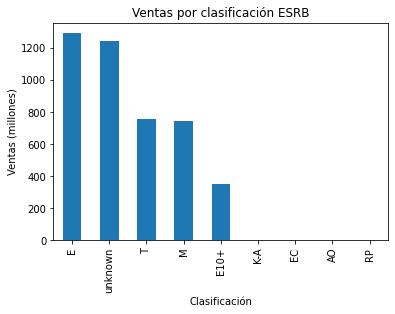

In [54]:
eu = games[["name", "platform", "genre", "eu_sales", "rating"]].groupby("rating")["eu_sales"].sum().sort_values(ascending=False)

na.plot(kind="bar",title="Ventas por clasificación ESRB",xlabel="Clasificación",ylabel="Ventas (millones)")
plt.show()

# Conclusión.
---
Podemos ver que cada zona tiene sus gustos, Europa y América del Norte no son muy distintos, en cambio, Japón tiene sus preferencias en consolas y géneros. 

Sería interesante descubrir el motivo principal, yo lo podría relacionar a los conflictos bélicos que sucedieron en el pasado y a las consecuencias que estos provocaron en la sociedad.

# Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

* Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC NO son las mismas.
* Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [57]:
xone_scores = games[games["platform"] == "XOne"]["user_score"]
xone_scores.fillna(6.15, inplace=True)

pc_scores = games[games["platform"] == "PC"]["user_score"]
pc_scores.fillna(6.64, inplace=True)

alpha = 0.5
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("valor p: ", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.00021719237289349264
Rechazamos la hipótesis nula


Al tratar de realizar la prueba estadística, los valores ausentes afectaban el resultado final, por lo tanto fueron reemplazados con el valor promedio, ya que este se encuentra demasiado cerca a la mediana. 

Para poder probar las hipótesis tuvimos que comparar la igualdad de las medias de ambas poblaciones, el resultado no fue el que yo esperaba, dado a la diferencia entre ambos promedios.

El valor alfa utilizado fue del 5%.

# Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.

* Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de acción y deportes NO son diferentes.
* Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.

In [56]:
sports_scores = games[games["genre"] == "Sports"]["user_score"]
sports_scores.fillna(6.5, inplace=True)

action_scores = games[games["genre"] == "Action"]["user_score"]
action_scores.fillna(7, inplace=True)

alpha = 0.5
results = st.ttest_ind(sports_scores, action_scores, equal_var=False)

print("valor p: ", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  7.900923372755704e-21
Rechazamos la hipótesis nula


Al tratar de realizar la prueba estadística, los valores ausentes afectaban el resultado final, en este caso decidí reemplazarlos con la mediana, consideré que el valor promedio se encontraba un poco lejos, más de 1 punto de diferencia en una escala que va de 0 a 10.

Para poder probar las hipótesis tuvimos que comparar la igualdad de las medias de ambas poblaciones, el resultado fue el que yo esperaba, pero me gustaría poder conocer el proceso completo que esta función realiza con todos los datos que le proporcionamos.

El valor alfa utilizado fue del 5%.